![Image](./resources/header.png)
<h1 align="center">Navigating the Allen Brain Observatory</h1> 
<h3 align="center">TReND CaMinA 2024</h3>

<div style="background: #ADD8E6; border-radius: 3px; padding: 10px;">

In this notebook we will use data from the Visual Coding dataset to look at how a neuron responds to visual stimulus. We will compute a "tuning curve" for a neuron's response to the drifting grating stimulus. This will reinforce how we access and work with these data.
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Brain Observatory Setup

In [2]:
import os
import platform

# Set file location based on platform. 
platstring = platform.platform()
if ('Darwin' in platstring) or ('macOS' in platstring):
    # macOS 
    data_root = "/Volumes/TReND2024/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn' in platstring):
    # then on Code Ocean
    data_root = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/TReND2024/"

manifest_file = os.path.join(data_root,'allen-brain-observatory/visual-coding-2p/manifest.json')

`manifest_file` is a path to the manifest file.  This needs to reflect where you are storing and accessing the data. If you leave this out, a manifest file will be created in your working directory, and data will be downloaded to this location.

In [3]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

#This instantiates the Brain Observatory Cache
boc = BrainObservatoryCache(manifest_file=manifest_file)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<h1>Part 1: Compute the tuning curve for the drifting grating stimulus</h1>

We are going to look at the response of a single neuron, identified by its `cell specimen id`.

</div>

In [6]:
cell_id = 541513979

First get the dataset for the **experiment session** that this cell is in that has the drifting grating stimulus

In [7]:
exps = boc.get_ophys_experiments(cell_specimen_ids=[cell_id], stimuli=['drifting_gratings'])
session_id = exps[0]['id']
data_set = boc.get_ophys_experiment_data(session_id)

<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Exercise:** Get the DF/F traces for this session. How many neurons are in this experiment?</div>

In [6]:
timestamps, dff = data_set.get_dff_traces()

In [7]:
dff.shape

(290, 115741)

<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Exercise:** Find the cell specimen index for the neuron we're looking for</div>

In [8]:
cell_index = data_set.get_cell_specimen_indices([cell_id])[0]
print(cell_index)

6


<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Exercise:** Extract the trace for our chosen neuron and call it dff_trace. </div>

In [9]:
dff_trace = dff[cell_index,:]

Let's plot the DF/F trace of our neuron to see what it looks like.

Text(0, 0.5, 'DFF')

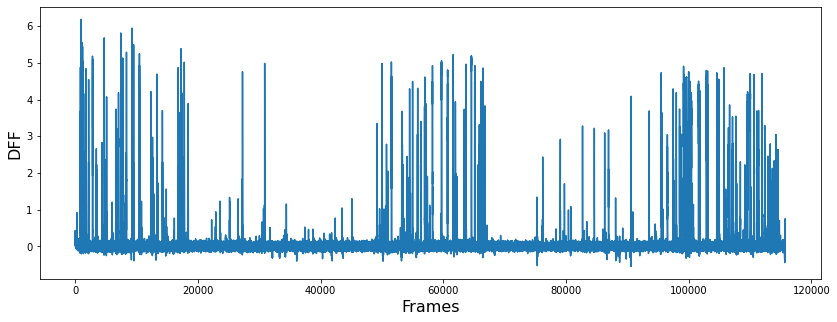

In [10]:
plt.figure(figsize=(14,5))
plt.plot(dff_trace)
plt.xlabel("Frames", fontsize=16)
plt.ylabel("DFF", fontsize=16)

<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Exercise:** Get the stimulus table for the drifting grating stimulus. Call it stim_table</div>

In [11]:
stim_table = data_set.get_stimulus_table('drifting_gratings')

Let's look at the stimulus table to see what information there is. 

In [12]:
stim_table.head()

,temporal_frequency,orientation,blank_sweep,start,end
0,1.0,45.0,0.0,736,796
1,15.0,90.0,0.0,826,886
2,1.0,270.0,0.0,917,977
3,NaN,NaN,1.0,1007,1067
4,4.0,90.0,0.0,1098,1158


<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Exercise:** What are the orientations and temporal frequencies that are used? What is the duration of each trial? How much time is between the trials?</div>

In [13]:
np.sort(stim_table.orientation.unique())

array([  0.,  45.,  90., 135., 180., 225., 270., 315.,  nan],
      dtype=float32)

In [14]:
np.sort(stim_table.temporal_frequency.unique())

array([ 1.,  2.,  4.,  8., 15., nan], dtype=float32)

In [15]:
stim_table.end-stim_table.start

0      60
1      60
2      60
3      60
4      60
       ..
623    60
624    60
625    60
626    60
627    60
Length: 628, dtype: int64

In [16]:
stim_table.start[1] - stim_table.end[0]

30

To look at the neuron's response to a given trial, let's plot the DF/F of the cell during that trial.  

For visualization purposes, let's pad the plot with ~ 1 second of the DF/F trace preceding the grating presentation and ~ 1 second after the presentation. (1 second = 30 frames.) We'll plot the response to the first trial. Print the grating direction and temporal frequency as well.

Direction:  45.0
Temporal frequency:  1.0


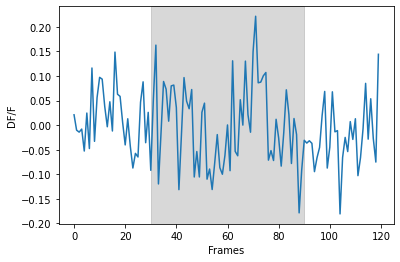

In [17]:
plt.plot(dff_trace[stim_table.start[0]-30:stim_table.end[0]+30])


plt.axvspan(30,90, color='gray', alpha=0.3) #this shades the period when the stimulus is being presented
plt.ylabel("DF/F")
plt.xlabel("Frames")

print("Direction: ", stim_table.orientation[0])
print("Temporal frequency: ", stim_table.temporal_frequency[0])

Quantify this response by calculating the mean DF/F during the grating presentation. Only take the mean during the presentation.

In [18]:
dff_trace[stim_table.start[0]:stim_table.end[0]].mean()

-0.0020014683

<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Exercise:** Repeat this (the plot and the quantification) for the next trial. </div>

Direction:  90.0
Temporal frequency:  15.0


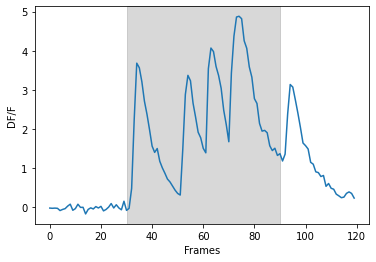

In [19]:
plt.plot(dff_trace[stim_table.start[1]-30:stim_table.end[1]+30])

plt.axvspan(30,90, color='gray', alpha=0.3) #this shades the period when the stimulus is being presented
plt.ylabel("DF/F")
plt.xlabel("Frames")

print("Direction: ", stim_table.orientation[1])
print("Temporal frequency: ", stim_table.temporal_frequency[1])

In [20]:
dff_trace[stim_table.start[1]:stim_table.end[1]].mean()

2.292613

To compute the tuning curve of this neuron, we need to compute this mean response to each trial of the stimulus. How many trials are there in total?

In [21]:
len(stim_table)

628

Let's do this systematically. We'll create a pandas DataFrame to hold the response of our neuron to each trial. This DataFrame needs to have the same number of trials as the stimulus table and (for now) just one column.

In [22]:
response = pd.DataFrame(columns=('orientation','temporal_frequency','trial_response'), index=stim_table.index.values) 

In [23]:
response['orientation'] = stim_table.orientation
response['temporal_frequency'] = stim_table.temporal_frequency

In [24]:
pd.options.mode.copy_on_write = True #this let's us write into the dataframe 

In [25]:
for ind,row_stim in stim_table.iterrows():
    response.loc[ind, 'trial_response'] = dff_trace[int(row_stim.start):int(row_stim.end)].mean()

Confirm that the first two trials give us the same result as we saw when we computed it individually

In [26]:
response.head()

,orientation,temporal_frequency,trial_response
0,45.0,1.0,-0.002001
1,90.0,15.0,2.292613
2,270.0,1.0,4.739945
3,NaN,NaN,0.04653
4,90.0,4.0,3.047691


Let's look at these response. Plot the trial_response for all trials.

Text(0, 0.5, 'Mean DFF (%)')

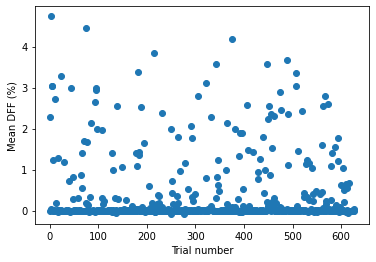

In [27]:
plt.plot(response.trial_response, 'o')
plt.xlabel("Trial number")
plt.ylabel("Mean DFF (%)")

If we only care about one stimulus parameter, we can quickly compare the response to that parameter, say the direction. Here we will plot each grating response as a function of the grating orientation.

Text(0, 0.5, 'Mean DF/F')

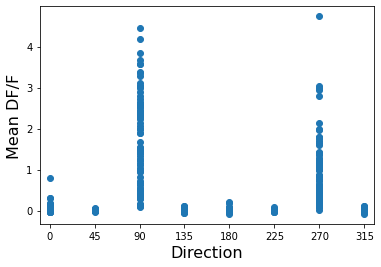

In [28]:
plt.plot(response.orientation.values, response.trial_response.values, 'o')
plt.xticks(range(0,360,45))
plt.xlim(-10,325)
plt.xlabel("Direction", fontsize=16)
plt.ylabel("Mean DF/F", fontsize=16)

<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Exercise 2:** Repeat this plot for the temporal frequency parameter </div>

Text(0, 0.5, 'Mean DF/F')

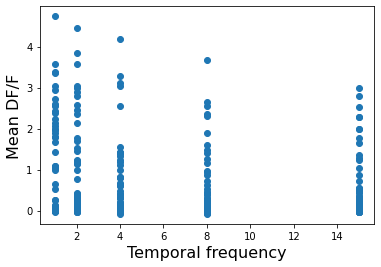

In [29]:
plt.plot(response.temporal_frequency.values, response.trial_response.values, 'o')
plt.xlabel("Temporal frequency", fontsize=16)
plt.ylabel("Mean DF/F", fontsize=16)

Let's compute the mean response for each orientation by averaging all of the trials for a given orientation together. To do this, you need to know what all the possible orientation values are.  Find the <b>unique</b> values that are not NaNs (eg. values that are <b>finite</b>) from either the stimulus table or the response dataframe you just made. Sort these in ascending order.

In [30]:
all_ori = np.sort(stim_table.orientation.unique())
orivals = all_ori[np.isfinite(all_ori)]
print(orivals)

[  0.  45.  90. 135. 180. 225. 270. 315.]


In [31]:
#alternate method
np.sort(stim_table.orientation.dropna().unique())

array([  0.,  45.,  90., 135., 180., 225., 270., 315.], dtype=float32)

Pandas allows us to select rows of the dataframe on a condition. For example, let's get all the trials when the orientation is 0

In [32]:
response[response.orientation==0]

,orientation,temporal_frequency,trial_response
9,0.0,4.0,0.015196
12,0.0,2.0,0.188865
13,0.0,1.0,-0.003244
17,0.0,15.0,-0.025243
22,0.0,1.0,-0.011316
...,...,...,...
584,0.0,4.0,-0.007417
585,0.0,2.0,0.008518
589,0.0,1.0,0.126371
611,0.0,4.0,-0.032946


Compute and plot the mean response as a function of orientation

Make an array of length 8 to hold your results. Iterate over the orientation values, select the trials that have that orientation, and average the responses together.


In [33]:
tuning = np.empty((8))
for i, ori in enumerate(orivals):
    trials = response[response.orientation==ori]
    tuning[i] = trials.trial_response.mean()
    #tuning[i] = response[response.orientation==ori].trial_response.mean()

Text(0, 0.5, 'Mean response (DFF)')

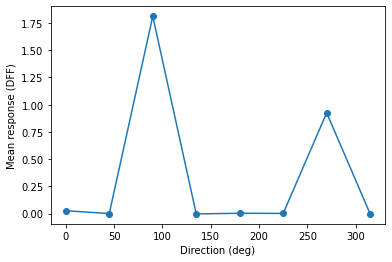

In [34]:
plt.plot(orivals,tuning, 'o-')
plt.xlabel("Direction (deg)")
plt.ylabel("Mean response (DFF)")

<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Exercise 4:** Compute and plot the mean response as a function of temporal frequency for all orientations. </div>

In [35]:
tfvals = np.sort(stim_table.temporal_frequency.unique())
tfvals = tfvals[np.isfinite(tfvals)]
print(tfvals)

[ 1.  2.  4.  8. 15.]


In [36]:
tuning_tf = np.empty((len(tfvals)))
for i,tf in enumerate(tfvals):
    trials = response[response.temporal_frequency==tf]
    tuning_tf[i] = trials.trial_response.mean()

Text(0, 0.5, 'Mean response (DFF)')

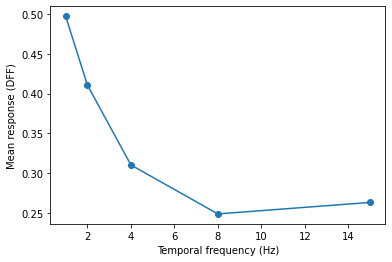

In [37]:
plt.plot(tfvals, tuning_tf, 'o-')
plt.xlabel("Temporal frequency (Hz)")
plt.ylabel("Mean response (DFF)")

<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Exercise 5:** Add errorbars to the above tuning curves. They can be standard deviation or standard error or the mean.  (Hint: `plt.errorbar` might be a useful function).
</div>

In [38]:
tuning_std = np.empty((8))
for i, ori in enumerate(orivals):
    trials = response[response.orientation==ori]
    tuning_std[i] = trials.trial_response.std()

Text(0, 0.5, 'Mean response (DFF)')

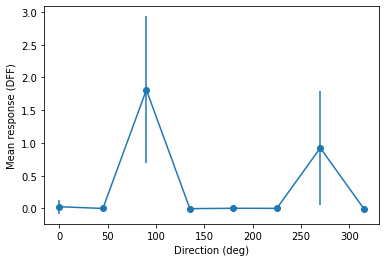

In [39]:
plt.errorbar(orivals, tuning, yerr=tuning_std, fmt='o-')
plt.xlabel("Direction (deg)")
plt.ylabel("Mean response (DFF)")

<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
**Exercise 6:** Add a black line showing the mean response to the blank sweep (Hint 1: orientation and temporal frequency are NaN for the blank sweep condition.  Hint 2: plt.axhline might be a useful function).  </div>

In [40]:
blank_trials = response[np.isnan(response.orientation)]
blank_mean = blank_trials.trial_response.mean()
print(blank_mean)

0.019221893672285408


Text(0, 0.5, 'Mean response (DFF)')

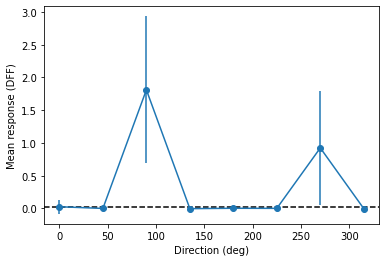

In [41]:
plt.errorbar(orivals, tuning, yerr=tuning_std, fmt='o-')
plt.axhline(y=blank_mean, ls='--', color='k')

plt.xlabel("Direction (deg)")
plt.ylabel("Mean response (DFF)")

<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Exercise 7:** So far we've been looking at each dimension separately, e.g. looking at direction tuning across all temporal frequencies. Now let's compute and plot the direction tuning curve separately for each of the 5 temporal frequencies. 
<p> What shape array do we need to hold this?
</div>

In [42]:
tuning_array = np.empty((8,5))
for i,tf in enumerate(tfvals):
    for j,ori in enumerate(orivals):
        trials = response[(response.orientation==ori)&(response.temporal_frequency==tf)]
        tuning_array[j,i] = trials.trial_response.mean()

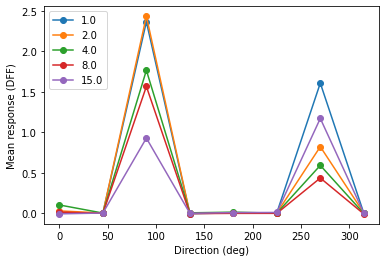

In [43]:
for i in range(5):
    plt.plot(orivals, tuning_array[:,i], 'o-', label=tfvals[i])
plt.xlabel("Direction (deg)")
plt.ylabel("Mean response (DFF)")
plt.legend()

Plot the response for each direction separately

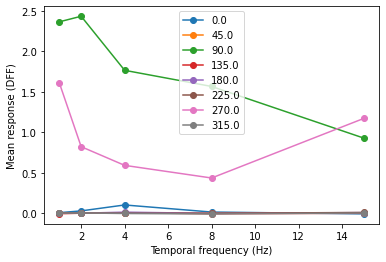

In [44]:
for i in range(8):
    plt.plot(tfvals, tuning_array[i,:], 'o-', label=orivals[i])
plt.xlabel("Temporal frequency (Hz)")
plt.ylabel("Mean response (DFF)")
plt.legend()

Plot a heatmap of the responses to all conditions

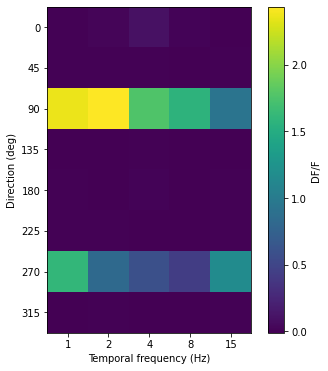

In [45]:
fig = plt.figure(figsize=(6,6))
plt.imshow(tuning_array)
plt.xticks(range(5), tfvals.astype(int))
plt.yticks(range(8), orivals.astype(int))
plt.xlabel("Temporal frequency (Hz)")
plt.ylabel("Direction (deg)")
cbar = plt.colorbar()
cbar.set_label("DF/F")

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<h1> Part 2: Compute and compare the tuning for all neurons in this experiment</h1>

Now we are going to compute the same tuning curve for all of the neurons in your experiment. 
</div>

We'll take the dff traces for all of the neurons in this experiment and compute the trial responses for each neuron. We'll put these in a DataFrame where each row is a trial (with the same index as the stimulus table) and each column is a neuron's response.

In [46]:
number_cells = dff.shape[0]
trial_responses = pd.DataFrame(index=stim_table.index.values, columns=np.array(range(number_cells)).astype(str))

for ind,row_stim in stim_table.iterrows():
    trial_responses.loc[ind] = dff[:, int(row_stim.start):int(row_stim.end)].mean(axis=1)



In [47]:
trial_responses

,0,1,2,3,4,5,6,7,8,9,...,280,281,282,283,284,285,286,287,288,289
0,0.026455,0.060133,0.025119,0.026872,0.033204,0.021551,-0.002001,0.378325,0.024443,-0.013501,...,0.028127,-0.000604,0.033558,0.036927,0.004606,0.041633,0.048106,-0.002141,0.034702,0.016892
1,0.012551,-0.01437,0.000899,0.002846,0.00901,0.014227,2.292613,-0.006842,0.003347,0.022002,...,0.001596,0.00936,0.001257,0.039661,0.01539,0.001279,0.016545,0.000014,0.000533,-0.000918
2,-0.011784,0.020128,0.004778,0.005225,0.013593,0.002572,4.739945,0.005782,0.009209,0.005103,...,0.009171,0.00513,-0.010691,0.015959,0.004454,0.019409,0.093703,0.028528,-0.001123,0.010365
3,0.001233,-0.002286,0.001167,-0.016667,0.002158,0.002834,0.04653,0.000027,-0.004138,0.006552,...,0.001391,-0.00127,-0.000628,0.009566,0.003027,0.004356,-0.010999,0.003945,0.001226,0.001905
4,-0.002383,0.001138,0.002942,0.001685,-0.005541,0.003797,3.047691,-0.006105,-0.005704,-0.001736,...,0.004242,0.010164,0.002966,0.034748,0.00183,0.002683,0.002515,-0.01519,-0.000679,0.005941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,0.021956,0.008006,0.002361,0.019681,0.002131,0.010154,-0.003795,0.29136,0.008983,0.006483,...,0.007565,0.015214,0.003093,0.006711,0.000824,0.011278,0.010833,0.013092,0.001594,0.004204
624,-0.006269,0.010163,0.00451,-0.005115,0.008583,0.010329,-0.00777,0.027543,0.007239,-0.013648,...,-0.004457,-0.003346,0.008342,0.002152,-0.011681,0.006391,0.000045,0.012348,0.020085,0.014797
625,-0.010379,-0.002275,-0.002682,-0.000722,-0.001605,0.001523,0.006659,0.011934,-0.002931,-0.004874,...,-0.004238,-0.002278,0.017991,0.016787,0.178841,0.010042,0.008684,0.00481,0.003778,-0.003707
626,0.014448,0.011278,0.014689,0.016362,0.01554,0.00981,-0.003496,0.018924,0.002081,0.000045,...,-0.005843,0.007084,0.007056,0.002136,0.003953,0.01604,0.012263,0.015153,0.005597,0.00103


Let's compute the tuning for all our neurons. We'll create an array with dimensions (8,5,number cells) with the mean response to each condition (i.e. the 2D tuning) for each neuron in this experiment

In [48]:
response = np.empty((8,5,number_cells))    

In [49]:
response = np.empty((8,5,number_cells))
for i,ori in enumerate(orivals):
    for j,tf in enumerate(tfvals):
        subset = trial_responses[(stim_table.orientation==ori)&(stim_table.temporal_frequency==tf)]
        response[i,j,:] = subset.mean(axis=0).values

Confirm this by plotting the tuning for the neuron that we used above. 

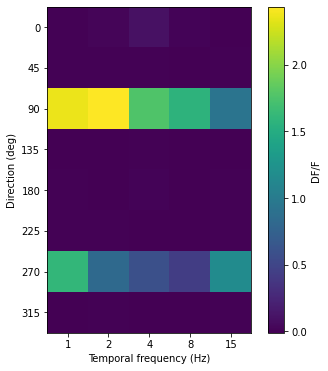

In [50]:
fig = plt.figure(figsize=(6,6))
plt.imshow(response[:,:,cell_index])
plt.xticks(range(5), tfvals.astype(int))
plt.yticks(range(8), orivals.astype(int))
plt.xlabel("Temporal frequency (Hz)")
plt.ylabel("Direction (deg)")
cbar = plt.colorbar()
cbar.set_label("DF/F")

<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Exercise** Let's look at some other neurons. Here's a list of ids from this experiment. Find the cell indices for these ids and plot their tunings.
</div>.

In [51]:
ids = [541511905, 541512490, 541512611, 541512645, 541512079, 541511403, 541511670, 541511373, 541513771, 541511385, 541512607]

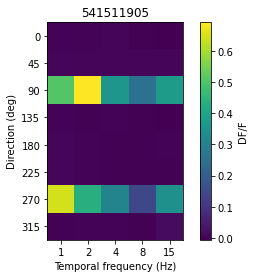

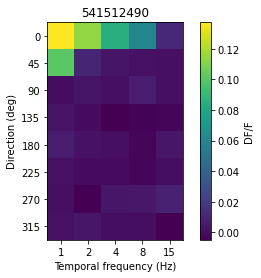

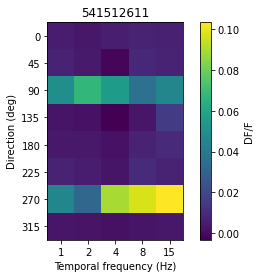

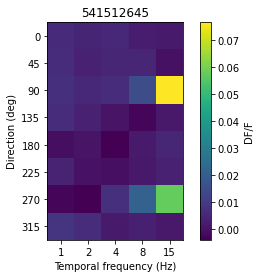

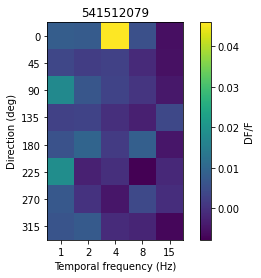

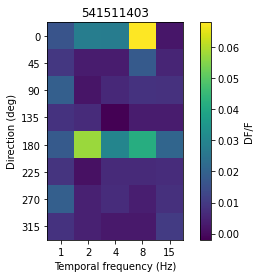

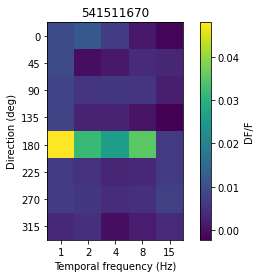

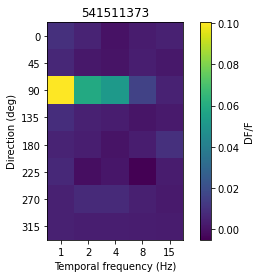

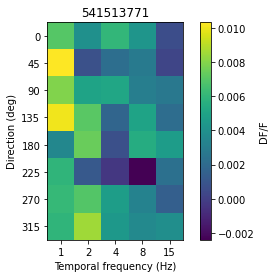

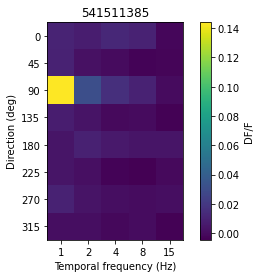

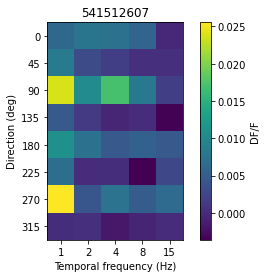

In [52]:
for cellid in ids:
    index = data_set.get_cell_specimen_indices([cellid])[0]
    plt.imshow(response[:,:,index])
    plt.xticks(range(5), tfvals.astype(int))
    plt.yticks(range(8), orivals.astype(int))
    plt.xlabel("Temporal frequency (Hz)")
    plt.ylabel("Direction (deg)")
    plt.title(cellid)
    cbar = plt.colorbar()
    cbar.set_label("DF/F")
    plt.show()

<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Discuss:** What are some of the differences that we see among these neurons? Are there some metrics we could use to quantify them?</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<h1> Part 3: Movie responses </h1>

Drifting gratings isn't the only stimulus presented during this session. Let's look at the response of our neuron to the natural movies.
</div>

Find what other stimuli were presented during this session.

In [54]:
data_set.get_stimulus_epoch_table()

,stimulus,start,end
0,drifting_gratings,736,18810
1,natural_movie_three,19746,37850
2,natural_movie_one,38756,47807
3,drifting_gratings,48712,66786
4,spontaneous,66936,75868
5,natural_movie_three,75869,93972
6,drifting_gratings,94878,115485


The DF/F traces we have are for the entire session, so we already have that. But we need the stimulus table for the natural movie.

In [55]:
stim_table_nm3 = data_set.get_stimulus_table('natural_movie_three')

In [56]:
stim_table_nm3.head()

,frame,start,end,repeat
0,0,19746,19747,0
1,1,19747,19748,0
2,2,19748,19749,0
3,3,19749,19750,0
4,4,19750,19751,0


<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Exercise:** How many frames are in the natural movie? How many repeats? </div>

In [57]:
num_frames = len(stim_table_nm3.frame.unique())
print(num_frames)

3600


In [58]:
num_repeats = len(stim_table_nm3.repeat.unique())
print(num_repeats)

10


Let's look at the first and the last frame of the movie. Get the stimulus template for this movie and plot the first and the last frame of the movie.

In [59]:
template = data_set.get_stimulus_template('natural_movie_three')

In [60]:
template.shape

(3600, 304, 608)

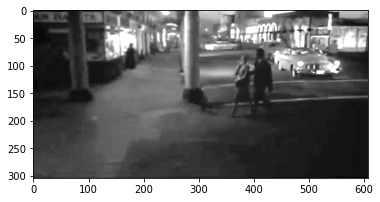

In [61]:
plt.imshow(template[0,:,:], cmap='gray')

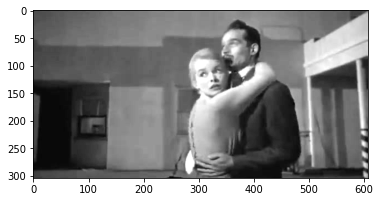

In [62]:
plt.imshow(template[-1,:,:], cmap='gray')

Compute the mean response for each neuron to the movie.  

In [63]:
response_nm3 = np.empty((number_cells, num_frames))
temp = np.empty((number_cells, num_frames, num_repeats))
for i in range(num_repeats):
    start_time = int(stim_table_nm3[(stim_table_nm3.frame==0)&(stim_table_nm3.repeat==i)].start)
    temp[:,:,i] = dff[:, start_time:start_time+num_frames]
response_nm3 = temp.mean(axis=2)

<ipython-input-63-00fdbcf5340f>:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  start_time = int(stim_table_nm3[(stim_table_nm3.frame==0)&(stim_table_nm3.repeat==i)].start)


Plot the mean movie response for the cell you analyzed above

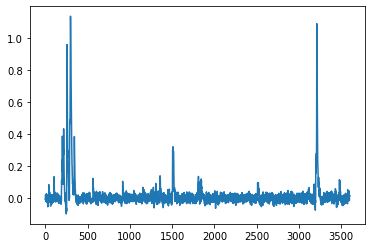

In [64]:
plt.plot(response_nm3[cell_index,:])

<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Exercise 9:** Plot these movie responses for some of the other neurons that we looked at above.
</div>.